In [1]:
import os
os.chdir('..')

In [2]:
import torch
from rdkit import Chem
from src.tacogfn.utils.unidock import unidock_scores

/home/tsa87/anaconda3/envs/tacogfn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
rec_folder = "dataset/crossdocktest_pdbqt"
pocket_to_centroid_path = "dataset/pocket_to_centroid.pt"

In [4]:
pocket_to_centroid = torch.load(pocket_to_centroid_path)

In [5]:
pocket_to_centroid['14gs_A']

(24.261727272727274, 6.685454545454546, 27.79195454545455)

In [5]:
unidock_scores(['c1ccccc1'], os.path.join(rec_folder, '4rn0_B_rec.pdbqt'), -21.05715151515151, -5.662727272727273, 3.1404848484848484)

/home/tsa87/anaconda3/envs/tacogfn/lib/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


[INFO][2024-05-07 11:43:33,733][main.py 28] [Params] {'cmd': 'unidock_pipeline', 'receptor': 'dataset/crossdocktest_pdbqt/4rn0_B_rec.pdbqt', 'ligands': None, 'ligand_index': '/tmp/tmpwxlc65gq/smiles_list.txt', 'center_x': -21.05715151515151, 'center_y': -5.662727272727273, 'center_z': 3.1404848484848484, 'size_x': 22.5, 'size_y': 22.5, 'size_z': 22.5, 'workdir': 'unidock_pipeline_fsxps', 'savedir': '/tmp/tmpwxlc65gq/docking', 'batch_size': 18000, 'scoring_function': 'vina', 'search_mode': '', 'exhaustiveness': 128, 'max_step': 20, 'num_modes': 3, 'refine_step': 3, 'energy_range': 3.0, 'topn': 100, 'score_only': False, 'local_only': False, 'seed': 181129, 'debug': False}
[INFO][2024-05-07 11:43:33,734][unidock_pipeline.py 223] [UniDock Pipeline] 1 ligands found.
[INFO][2024-05-07 11:43:33,734][unidock_pipeline.py 225] [UniDock Pipeline] Start
[INFO][2024-05-07 11:43:33,738][unidock_pipeline.py 238] [UniDock Pipeline] Start docking
[INFO][2024-05-07 11:43:33,758][unidock.py 94] unidock c

[-3.613]

In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import rdMolDraw2D

# Load molecules from SMILES
smiles1 = "CCOCC"
smiles2 = "C1CCOC1"
mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)

# Generate 2D coordinates for initial molecules
# Generate 3D coordinates if not present
mol1 = Chem.AddHs(mol1)
AllChem.EmbedMolecule(mol1)
AllChem.MMFFOptimizeMolecule(mol1)
mol2 = Chem.AddHs(mol2)
AllChem.EmbedMolecule(mol2)
AllChem.MMFFOptimizeMolecule(mol2)

# Align molecules
AllChem.AlignMol(mol2, mol1)

# Use RDKit to visualize (simple visualization)
from rdkit.Chem import Draw
img = Draw.MolsToGridImage([mol1, mol2], subImgSize=(300, 300), legends=['Mol1', 'Mol2'])
img

RuntimeError: No sub-structure match found between the probe and query mol

In [6]:
with open("aligned_molecules.png", "wb") as f:
    f.write(drawer.GetDrawingText())

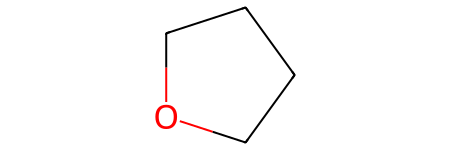

In [8]:
Chem.MolFromSmiles("C1CCOC1")